In [111]:
# import required libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
# load and read dataset
dataset = pd.read_csv('ice_cream_sales.csv')
dataset.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [60]:
# find info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In [61]:
# decribe dataset further
dataset.describe()

,Temperature,Ice Cream Profits
count,365.000000,365.000000
mean,71.980822,52.103616
std,13.258510,15.989004
min,39.000000,11.880000
25%,63.000000,40.650000
50%,73.000000,53.620000
75%,82.000000,63.630000
max,101.000000,89.290000


In [62]:
# find null values if any
dataset.isnull().sum()

Temperature          0
Ice Cream Profits    0
dtype: int64

In [63]:
# all columns
dataset.columns

Index(['Temperature', 'Ice Cream Profits'], dtype='object')

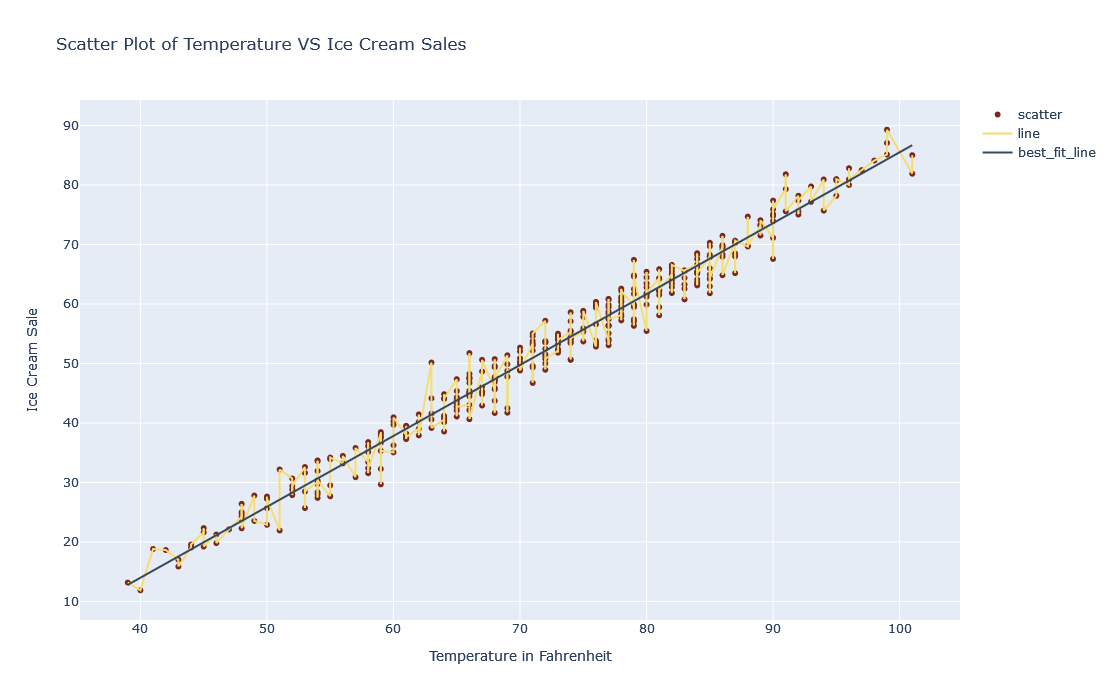

In [64]:
# now use plotly to draw a scatter plot

slope, intercept = np.polyfit(dataset['Temperature'], dataset['Ice Cream Profits'], 1)

best_fit_line = slope * dataset['Temperature'] + intercept

fig = go.Figure()

fig.add_trace(go.Scatter(x = dataset['Temperature'], y = dataset['Ice Cream Profits'], marker = dict(color = '#78281f'), mode = 'markers', name='scatter'))
fig.add_trace(go.Scatter(x = dataset['Temperature'], y = dataset['Ice Cream Profits'], mode = 'lines', marker = dict(color = '#f7dc6f'), name = 'line'))
fig.add_trace(go.Scatter(x = dataset['Temperature'], y = best_fit_line, mode = 'lines', name = 'best_fit_line', marker = dict(color = '#34495e')))
fig.update_layout(title = 'Scatter Plot of Temperature VS Ice Cream Sales', xaxis_title = 'Temperature in Fahrenheit', yaxis_title = 'Ice Cream Sale')
fig.update_layout(height = 700, width = 1100)
fig.show()

In [65]:
# now lets find correlation between both variables
x = dataset['Temperature']
y = dataset['Ice Cream Profits']

cor = x.corr(y)
print("The correlation is", cor)

The correlation is 0.988445722420947


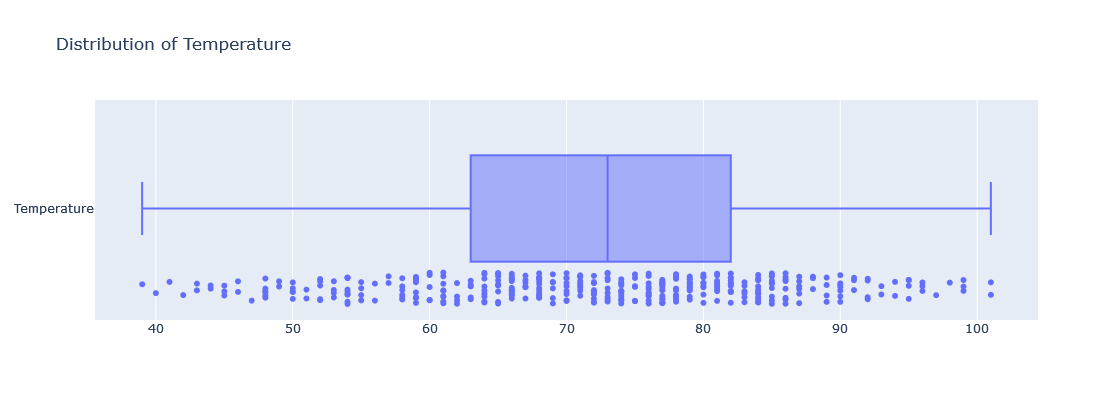

In [66]:
# now plot boxplot
fig = go.Figure()

fig.add_trace(go.Box(x = x, boxpoints = 'all', name = 'Temperature'))
fig.update_layout(title = 'Distribution of Temperature', height = 400)
fig.show()

In [67]:
# find outliers in Temperatures column
# make a list for outliers
outliers = []

# min and max values
min = np.min(x)
max = np.max(x)

# q1, q2, q3
q1 = np.percentile(x, 25)
q2 = np.percentile(x, 50)
q3 = np.percentile(x, 75)


# inter quartile range
iqr = q3 - q1

# upper and lower bound
upper_bound = q3 + iqr*1.5
lower_bound = q1 - iqr*1.5

print('Minimum:', min)
print('Maximum:', max)
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

for i in x:
    if (i < lower_bound or i > upper_bound):
        outliers.append(i)

if (len(outliers) == 0):
    print("There are no outliers!")
else:
    print("Outliers:", outliers)  

Minimum: 39
Maximum: 101
Lower Bound: 34.5
Upper Bound: 110.5
There are no outliers!


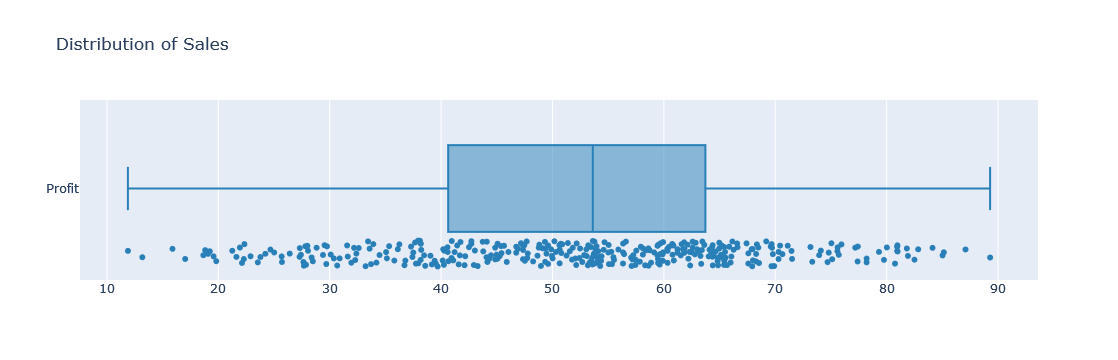

In [68]:
# plot boxplot for sales price
fig = go.Figure()

fig.add_trace(go.Box(x = y, boxpoints = 'all', name = 'Profit', marker = dict(color = '#2980b9')))
fig.update_layout(title = 'Distribution of Sales')
fig.show()

In [69]:
# find outliers in Temperatures column
# make a list for outliers
outliers = []

# min and max values
min = np.min(y)
max = np.max(y)

# q1, q2, q3
q1 = np.percentile(y, 25)
q2 = np.percentile(y, 50)
q3 = np.percentile(y, 75)


# inter quartile range
iqr = q3 - q1

# upper and lower bound
upper_bound = q3 + iqr*1.5
lower_bound = q1 - iqr*1.5

print('Minimum:', min)
print('Maximum:', max)
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

for i in y:
    if (i < lower_bound or i > upper_bound):
        outliers.append(i)

if (len(outliers) == 0):
    print("There are no outliers!")
else:
    print("Outliers:", outliers)  

Minimum: 11.88
Maximum: 89.29
Lower Bound: 6.179999999999993
Upper Bound: 98.10000000000001
There are no outliers!


In [70]:
dataset.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [71]:
# lets check are there any outliers using traditional methods in temperatures column
mean = np.mean(dataset['Temperature'])
std = np.std(dataset['Temperature'])
std

13.240335400443298

In [72]:
dataset.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [73]:
new_dataset = dataset.copy()
new_dataset.head(2)

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88


In [74]:
# find z scores and add a column named zscores
new_dataset['z_score'] = (new_dataset.Temperature - new_dataset.Temperature.mean())/new_dataset.Temperature.std()

In [75]:
new_dataset.head()

,Temperature,Ice Cream Profits,z_score
0,39,13.17,-2.487521
1,40,11.88,-2.412098
2,41,18.82,-2.336674
3,42,18.65,-2.261251
4,43,17.02,-2.185828


In [76]:
# find columns which have z_score less than -3 and greater than 3
new_dataset[new_dataset.z_score > 3]

,Temperature,Ice Cream Profits,z_score


In [77]:
#lets rename ice cream profits to just profits
new_dataset = new_dataset.rename(columns = {'Ice Cream Profits': 'Profits', 'z_score': 'Zscore_temp'})
new_dataset.head(2)

,Temperature,Profits,Zscore_temp
0,39,13.17,-2.487521
1,40,11.88,-2.412098


In [78]:
# add z_score for ice cream profits
new_dataset["Zscore_prof"] = (new_dataset.Profits - new_dataset.Profits.mean())/new_dataset.Profits.std()

In [79]:
new_dataset.head()

,Temperature,Profits,Zscore_temp,Zscore_prof
0,39,13.17,-2.487521,-2.435025
1,40,11.88,-2.412098,-2.515705
2,41,18.82,-2.336674,-2.081657
3,42,18.65,-2.261251,-2.092289
4,43,17.02,-2.185828,-2.194234


In [80]:
new_dataset[new_dataset.Zscore_prof > 3]

,Temperature,Profits,Zscore_temp,Zscore_prof


In [81]:
dataset.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [83]:
# rename ice cream column
dataset = dataset.rename(columns = {'Ice Cream Profits': 'Profits'})
dataset.head()

,Temperature,Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [88]:
# divide dataset into dependent and independent datasets
x = dataset.iloc[ : , : -1]
y = dataset.iloc[:, -1]
y.head()

0    13.17
1    11.88
2    18.82
3    18.65
4    17.02
Name: Profits, dtype: float64

In [90]:
# split data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [93]:
# since we do not have outliers in the data so build model
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)
y_pred

array([43.74881394, 61.65694375, 30.61618541, 25.84068412, 38.97331266,
       75.98344761, 41.3610633 , 67.62632036, 59.26919311, 18.6774322 ,
       44.94268926, 47.3304399 , 62.85081908, 65.23856972, 66.43244504,
       56.88144247, 66.43244504, 43.74881394, 58.07531779, 47.3304399 ,
       48.52431522, 55.68756715, 35.39168669, 66.43244504, 67.62632036,
       61.65694375, 36.58556201, 72.40182164, 44.94268926, 54.49369183,
       46.13656458, 43.74881394, 23.45293348, 29.42231009, 34.19781137,
       17.48355688, 35.39168669, 47.3304399 , 62.85081908, 36.58556201,
       56.88144247, 67.62632036, 56.88144247, 61.65694375, 24.6468088 ,
       67.62632036, 56.88144247, 58.07531779, 59.26919311, 36.58556201,
       52.10594119, 58.07531779, 59.26919311, 50.91206587, 42.55493862,
       35.39168669, 33.00393605, 47.3304399 , 41.3610633 , 38.97331266,
       71.20794632, 62.85081908, 18.6774322 , 42.55493862, 71.20794632,
       74.78957229, 35.39168669, 44.94268926, 58.07531779, 50.91

In [96]:
# find correlation of y_test and y_pred
y_test

106    42.10
259    64.45
45     27.99
26     27.31
78     39.53
       ...  
219    59.87
159    53.77
74     37.96
170    50.01
114    44.48
Name: Profits, Length: 73, dtype: float64

In [97]:
y_test

106    42.10
259    64.45
45     27.99
26     27.31
78     39.53
       ...  
219    59.87
159    53.77
74     37.96
170    50.01
114    44.48
Name: Profits, Length: 73, dtype: float64

In [122]:
# best fit line
slope, intercept = np.polyfit(y_test, y_pred, 1)
best_line = slope*y_test + intercept
print(slope)
print(intercept)

0.9811197316839375
0.834071982438596


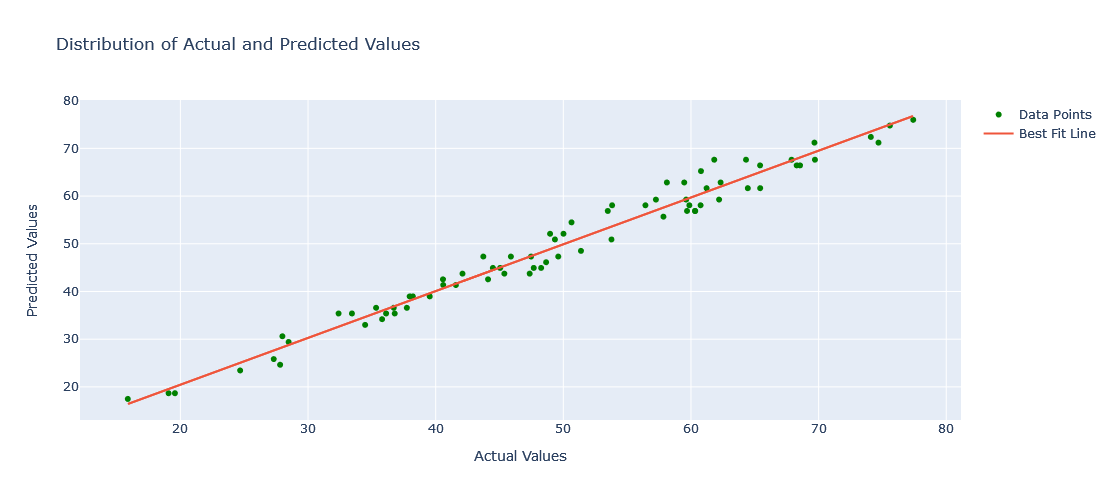

In [107]:
# plot a scatter plot to show how correctly model predicted test values
fig = go.Figure()

fig.add_trace(go.Scatter(x = y_test, y = y_pred, mode = 'markers', marker = dict(color = 'green'), name = 'Data Points'))
fig.add_trace(go.Scatter(x = y_test, y = best_line, name = 'Best Fit Line'))
fig.update_layout(title = 'Distribution of Actual and Predicted Values', xaxis_title = 'Actual Values', yaxis_title = 'Predicted Values')
fig.update_layout(height = 500)
fig.show()

In [109]:
# evaluate performance of this model
mean_absolute_error(y_test, y_pred)

2.028498878521587

In [110]:
# mean squared error
mean_squared_error(y_test, y_pred)

5.676106338976395

In [112]:
# r2_score
r2_score(y_test, y_pred)

0.9730455363388478

In [119]:
# predict proft for a temperature of 112
y_112 = linear_model.predict([[113]])
y_112

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([101.05482935])

In [120]:
slope

0.9811197316839375

In [121]:
intercept

0.834071982438596

In [130]:
x_train = x_train['Temperature']
x_train

295    84
63     59
241    79
306    85
317    86
       ..
323    87
192    74
117    66
47     55
172    72
Name: Temperature, Length: 292, dtype: int64

In [131]:
y_train

295    64.10
63     38.47
241    59.70
306    68.28
317    69.19
       ...  
323    65.19
192    54.28
117    45.07
47     27.68
172    52.47
Name: Profits, Length: 292, dtype: float64

In [133]:
# ployfit
slope1, intercept1 = np.polyfit(x_train.values, y_train.values, 1)
print(slope1)
print(intercept1)

1.1938753210034934
-33.85308192551015
